# Diamonds ANOVA Analysis

## **Introduction**

In this project, I will use Python to perform one-way and two-way ANOVA to analyze how categorical factors influence a continuous dependent variable. One-way ANOVA will help determine whether there are significant differences in the means of a dependent variable across three or more groups of a single categorical variable. Two-way ANOVA will extend this analysis by incorporating two categorical variables, allowing me to assess both their individual effects and any potential interaction between them. Additionally, I will apply a post hoc test to further investigate significant differences identified in the one-way ANOVA. Through this analysis, I aim to gain deeper insights into the relationships between categorical groupings and numerical outcomes, supporting data-driven decision-making.

## **Overview**  

This project investigates the relationship between diamond characteristics (color and cut) and their prices using statistical analysis in Python. The goal is to determine whether diamond color grades and cuts significantly impact price and to identify specific pairwise differences between groups. The analysis employs one-way and two-way ANOVA tests, followed by post hoc analysis to uncover detailed insights.  

To achieve this, I will:  

- **Perform Exploratory Data Analysis (EDA):** Examine the distribution of diamond prices across different color grades and cuts using visualizations such as boxplots to identify trends and variations.  

- **Conduct Data Cleaning:** Subset the dataset to focus on relevant diamond color grades (D, E, F, H, I) and cuts (Ideal, Premium, Very Good), remove missing values, and transform price data using logarithms for better modeling.  

- **Build Regression Models:** Construct linear regression models to assess the relationship between diamond price and categorical predictors (color and cut), including interaction terms for two-way ANOVA.  

- **Apply ANOVA Tests:** Perform one-way ANOVA to evaluate price differences across color grades and two-way ANOVA to analyze the combined effects of color and cut, along with their interaction.  

- **Run Post Hoc Analysis:** Use Tukey’s HSD test to identify which specific color grades have statistically significant price differences, controlling for multiple comparisons.  

- **Interpret and Summarize Findings:** Translate statistical results into actionable insights, such as which diamond color grades and cuts command higher prices and whether interactions between these factors influence pricing.  

By executing this workflow, I aim to provide data-driven insights into how diamond color and cut affect pricing, supporting informed decision-making for buyers, sellers, and industry analysts.

## **Dataset Structure**  

### **Diamonds Dataset**  
This dataset contains information on the physical and qualitative attributes of diamonds, including carat weight, cut quality, color, clarity, and pricing. The dataset helps analyze factors influencing diamond prices and evaluate trends in the diamond market.  

#### **Dataset: Diamonds Data**  
This dataset includes the following features:  

- **Carat**: The weight of the diamond in carats.  
- **Cut**: The quality of the diamond cut (Ideal, Premium, Very Good, Good, Fair).  
- **Color**: The color grade of the diamond, ranging from D (colorless) to J (tinted).  
- **Clarity**: The clarity rating, indicating the presence of inclusions or blemishes.  
- **Depth**: The total depth percentage of the diamond.
- **Table**: The width of the top facet of the diamond relative to its width.  
- **Price**: The price of the diamond in US dollars.  
- **X, Y, Z**: The physical dimensions of the diamond (length, width, and depth in mm).  

This dataset will be used to **analyze the relationships between diamond characteristics and pricing, apply statistical modeling techniques, and gain insights into factors that impact diamond valuation.**

## Importing Required Libraries
Before beginning the analysis, it is essential to import all necessary libraries. 

In [149]:
import pandas as pd
import seaborn as sns
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# One-way and two-way ANOVA (Part I)

First, I load the `diamonds` dataset from the `seaborn` package:  


In [150]:
diamonds = sns.load_dataset("diamonds", cache=False)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### **One-Way ANOVA: Testing Price Differences by Color Grade**

### Data Cleaning - Preparing for One-Way ANOVA

### Data Preparation and Feature Engineering

### **Initial Data Exploration**

In [151]:
diamonds["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [152]:
diamonds['color'].unique()


['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

Since the analysis requires a continuous variable and one categorical variable, I subset the dataset to include only relevant columns. Specifically, I focus on colorless diamonds:

In [153]:
diamonds_colorless = diamonds[diamonds["color"].isin(["E", "F", "H", "D", "I"])]
diamonds_colorless = diamonds_colorless[["color", "price"]].reset_index(drop=True)

To balance the dataset, I exclude **G** (overrepresented) and **J** (underrepresented) diamonds. The dropped categories are removed as follows:

In [154]:
diamonds_colorless.color = diamonds_colorless.color.cat.remove_categories(["G", "J"])


Next, I transform the **price** variable using a logarithmic scale:


In [155]:
diamonds_colorless.insert(2, "log_price", [math.log(price) for price in diamonds_colorless["price"]])


Finally, I drop missing values and reset the index:


In [156]:
diamonds_colorless.dropna(inplace=True)
diamonds_colorless.reset_index(inplace=True, drop=True)

In [157]:
diamonds_colorless.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


The cleaned dataset is saved as a CSV file:


In [158]:
diamonds_colorless.to_csv(r'Data/diamonds_color.csv', index=False, header=list(diamonds_colorless.columns))

### One-Way ANOVA

To run a one-way ANOVA, I first load the data and save it as a variable called diamonds_color. Then, I examine the dataset using the head() function to get an overview of its structure and contents.

In [159]:
diamonds_color = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Diamonds-ANOVA-Analysis\Data\diamonds_color.csv")


In [160]:
diamonds_color.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


One-way ANOVA helps me better understand the relationship between a categorical variable and a continuous variable. To start, I perform some basic exploratory data analysis by creating a boxplot using the boxplot() function from the seaborn package.

<Axes: xlabel='color', ylabel='log_price'>

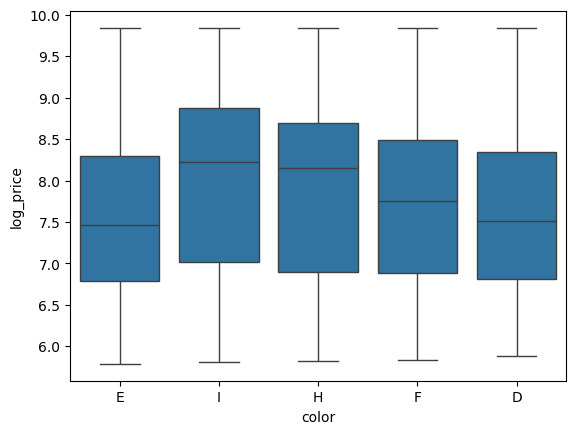

In [161]:
sns.boxplot(x="color", y="log_price", data=diamonds_color)



Based on the plot, I observe that there is a lot of overlap in the distribution of log_price for each color of diamond. However, I can't yet determine whether these differences are statistically significant. To confirm this, I will need to conduct a formal one-way ANOVA test.

To run ANOVA, I need to create a regression model. To do this,I will create a simple linear regression model where the independent variable (`X`) is `color`, which I will code as categorical using `C()`. Then, I will fit the model to the data and generate model summary statistics.  

In [162]:
model1 = ols(formula="log_price ~ C(color)", data=diamonds_color).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          3.61e-225
Time:                        21:31:12   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Interpretation of Results**  

The **R-squared** value tells me how much of the variation in **log_price** is explained by the model. I will also focus on the **beta coefficients** and their **p-values** to understand the relationship between the predictor (`color`) and the outcome variable (`log_price`).  

---

### **Model Summary**  
- **R-squared: 0.026**  
  - This means that **only 2.6% of the variation** in `log_price` is explained by the model. This suggests that `color` alone is not a strong predictor of `log_price`. Other factors likely have a much greater impact on diamond prices.  

- **Adj. R-squared: 0.026**  
  - Since the adjusted R-squared is the same as the R-squared, it confirms that adding more predictors would not improve the model significantly.  

- **F-statistic: 265.0, p-value: 3.61e-225**  
  - The very small p-value (**< 0.001**) indicates that the model is statistically significant overall. This means that at least one `color` category is significantly different from the baseline in predicting `log_price`.  

---

### **Coefficients and Interpretation**  
- **Intercept: 7.6169**  
  - This represents the predicted `log_price` for the baseline color (likely the omitted category, such as `color D`).  
  - Since it is **highly significant (p-value = 0.000)**, the intercept is meaningful in the model.  

- **C(color)[T.E]: -0.0375**  
  - The coefficient is negative, meaning that diamonds with color `E` have **lower log-transformed prices** than the baseline (`D`), on average.  
  - The p-value (**0.017**) is significant at the 5% level, meaning the difference is statistically meaningful.  

- **C(color)[T.F]: 0.1455**  
  - Diamonds with color `F` have **higher log-transformed prices** than those in `D` by **0.1455 units**, on average.  
  - The p-value (**0.000**) indicates strong statistical significance.  

- **C(color)[T.H]: 0.3015**  
  - Diamonds with color `H` have **higher log-transformed prices** than those in `D` by **0.3015 units**, on average.  
  - The p-value (**0.000**) confirms strong significance.  

- **C(color)[T.I]: 0.4061**  
  - Diamonds with color `I` have **higher log-transformed prices** than those in `D` by **0.4061 units**, on average.  
  - The p-value (**0.000**) shows strong statistical significance.  

---

### **Statistical Significance**  
- The **p-values** for all color categories are below 0.05, meaning they are statistically significant predictors of `log_price`.  
- However, the **low R-squared (0.026)** suggests that `color` alone does not explain much of the price variation.  

---

### **Key Observations**  
- **Color influences price**, but it is not a strong predictor alone.  
- **The model is statistically significant**, but its predictive power is weak (low R²).  
- **Higher color grades (e.g., F, H, I) tend to increase log_price** compared to the baseline (likely D).  
- **Further analysis should include other variables** like carat, cut, or clarity to improve the model’s explanatory power.  

This analysis suggests that while color affects diamond pricing, it is not the dominant factor, and I should explore additional predictors.

### **Regression vs. One-Way ANOVA: Understanding the Differences**  

When interpreting the regression model, the **p-values for each color grade** indicate whether that specific color is significantly different from the **baseline category** (which is `D`). This means that:  
- **Each color is compared to `D` individually** rather than to all other colors.  
- A significant p-value in the regression output tells me that the mean `log_price` for that color is statistically different from `D`, but it doesn't tell me whether other colors differ from each other.  

However, **one-way ANOVA** allows me to go a step further:  
- Instead of just checking if each color is different from `D`, I test whether **any** of the color groups have significantly different means from each other.  
- This means I check for differences **among all colors, not just relative to a baseline**.  
- If ANOVA is significant, I can then conduct **post-hoc tests** (like Tukey's HSD) to determine **which specific pairs of colors** have significant differences.  

### **Why Use ANOVA?**  
Based on the model summary table, the color grades' associated **beta coefficients all have a p-value of less than 0.05** (check the `P>|t|` column). This suggests that each color grade is significantly different from `D`. **But that doesn’t tell me whether other colors are significantly different from each other**.  

This is where one-way ANOVA comes in. Instead of looking at differences **only with respect to `D`**, ANOVA tests whether there is **any significant price difference across all colors**. If ANOVA finds significant differences, I would follow up with **post-hoc tests** to pinpoint which colors differ from each other.  

First, we have to state our null and alternative hypotheses:

#### Null Hypothesis

$$H_0: price_D=price_E=price_F=price_H=price_I$$

There is no difference in the price of diamonds based on color grade.

#### Alternative Hypothesis

$$H_1: \text{Not } price_D=price_E=price_F=price_H=price_I$$

There is a difference in the price of diamonds based on color grade.

I perform one-way ANOVA:

In [163]:
sm.stats.anova_lm(model1, typ=2)


,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [164]:
sm.stats.anova_lm(model1, typ=1)


,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


In [165]:
sm.stats.anova_lm(model1, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,393066.804852,1.0,399956.684283,0.000000e+00
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


### **ANOVA Results Interpretation**  

The ANOVA table provides the following key insights:  

- **The p-value for `C(color)` is extremely small (3.61e-225)**, which is far below the standard significance level of 0.05.  
- This allows me to **reject the null hypothesis**, meaning that **at least one diamond color group has a significantly different mean log_price compared to the others**.  
- The **F-statistic (265.0)** is very large, indicating that the between-group variability (differences in price across color categories) is much greater than the within-group variability (price differences within each color category).  

### **Observation**  

Since the ANOVA test is significant, I can conclude that **diamond price varies significantly across different color grades**. However, ANOVA does not tell me **which specific colors differ from each other**—it only indicates that at least one group is different.  

To determine **which color groups have significantly different mean prices**, I proceed with a **post-hoc Tukey’s HSD test** for pairwise comparisons. This test will be carried out in the next part of the notebook.

### **One-Way ANOVA: Testing Price Differences by Cut Quality**

### Data Cleaning - Preparing for One-Way ANOVA

### Data Preparation and Feature Engineering

### Initial Data Exploration

In [166]:
diamonds["cut"].value_counts()


cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [167]:
diamonds['cut'].unique()


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

Since the analysis requires a continuous variable and a categorical variable, I subset the dataset to include only relevant columns. Specifically, I focus on the main cut qualities of diamonds:

In [168]:
diamonds_mcut = diamonds[diamonds["cut"].isin(["Ideal", "Premium", "Very Good"])]
diamonds_mcut = diamonds_mcut[["cut", "price"]].reset_index(drop=True)

To balance the dataset, I exclude **Good** (underrepresented) and **Fair** (underrepresented) diamonds. The dropped categories are removed as follows:

In [169]:
diamonds_mcut.cut = diamonds_mcut.cut.cat.remove_categories(["Good","Fair"])

Next, I transform the **price** variable using a logarithmic scale:

In [170]:
diamonds_mcut.insert(2, "log_price", [math.log(price) for price in diamonds_mcut["price"]])

Finally, I drop missing values and reset the index:

In [171]:
diamonds_mcut.dropna(inplace=True)
diamonds_mcut.reset_index(inplace=True, drop=True)
diamonds_mcut.head()

,cut,price,log_price
0,Ideal,326,5.786897
1,Premium,326,5.786897
2,Premium,334,5.811141
3,Very Good,336,5.817111
4,Very Good,336,5.817111


The cleaned dataset is saved as a CSV file:


In [172]:
diamonds_mcut.to_csv(r'Data/diamonds_cut.csv', index=False, header=list(diamonds_mcut.columns))

### One-Way ANOVA

To run a one-way ANOVA, I first load the data and save it as a variable called diamonds_cut. Then, I examine the dataset using the head() function to get an overview of its structure and contents.

In [173]:
diamonds_cut = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Diamonds-ANOVA-Analysis\Data\diamonds_cut.csv")

diamonds_cut.head()


,cut,price,log_price
0,Ideal,326,5.786897
1,Premium,326,5.786897
2,Premium,334,5.811141
3,Very Good,336,5.817111
4,Very Good,336,5.817111


 To start, I perform some basic exploratory data analysis by creating a boxplot using the boxplot() function from the seaborn package.

<Axes: xlabel='cut', ylabel='log_price'>

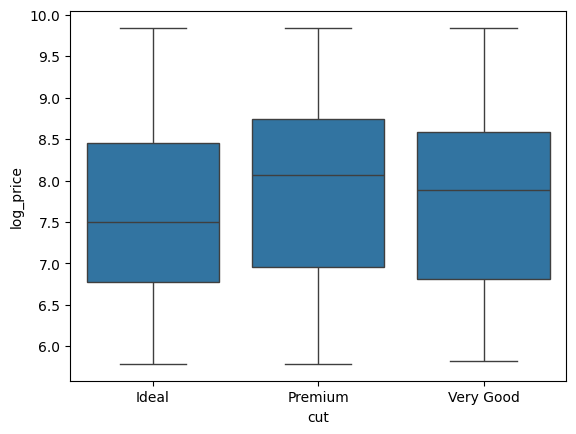

In [174]:
sns.boxplot(x="cut", y="log_price", data=diamonds_cut)

Based on the plot, I observe that the distribution of `log_price` varies across different `cut` categories (`Ideal`, `Premium`, and `Very Good`). While `Premium` diamonds appear to have a slightly higher median `log_price`, there is a considerable amount of overlap in the interquartile ranges of the three groups. However, I cannot yet determine whether these differences are statistically significant. To confirm this, I will conduct a formal one-way ANOVA test.

To run ANOVA, I need to create a regression model. To do this, I will create a simple linear regression model where the independent variable (`X`) is `cut`, which I will code as categorical using `C()`. Then, I will fit the model to the data and generate model summary statistics.

In [175]:
model2 = ols(formula="log_price ~ C(cut)", data=diamonds_cut).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     401.8
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          9.09e-174
Time:                        21:31:12   Log-Likelihood:                -67996.
No. Observations:               47424   AIC:                         1.360e+05
Df Residuals:                   47421   BIC:                         1.360e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.6395      0.007   1104.927      0.000       7.626       7.653
C(cut)[T.Premium]       0.3113      0.011     28.128      0.000       0.290       0.333
C(cut)[T.Very Good]     0.1592      0.012     13.800      0.000       0.137       0.182
==============================================================================
Omnibus:                    15696.350   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2401.035
Skew:                           0.146   Prob(JB):                         0.00
Kurtosis:                       1.937   Cond. No.                         3.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Interpretation of Results**  

The **R-squared** value tells me how much of the variation in **log_price** is explained by the model. I will also focus on the **beta coefficients** and their **p-values** to understand the relationship between the predictor (`cut`) and the outcome variable (`log_price`).  

---

### **Model Summary**  
- **R-squared: 0.017**  
  - This means that **only 1.7% of the variation** in `log_price` is explained by the model. This suggests that `cut` alone is not a strong predictor of `log_price`. Other factors likely have a much greater impact on diamond prices.  

- **Adj. R-squared: 0.017**  
  - Since the adjusted R-squared is the same as the R-squared, it confirms that adding more predictors would not improve the model significantly.  

- **F-statistic: 401.8, p-value: 9.09e-174**  
  - The very small p-value (**< 0.001**) indicates that the model is statistically significant overall. This means that at least one `cut` category is significantly different from the baseline in predicting `log_price`.  

---

### **Coefficients and Interpretation**  
- **Intercept: 7.6395**  
  - This represents the predicted `log_price` for the baseline cut (likely the omitted category, such as `Ideal`).  
  - Since it is **highly significant (p-value = 0.000)**, the intercept is meaningful in the model.  

- **C(cut)[T.Premium]: 0.3113**  
  - The coefficient is positive, meaning that diamonds with a **Premium** cut have **higher log-transformed prices** than the baseline (`Ideal`), on average.  
  - The p-value (**0.000**) indicates strong statistical significance.  

- **C(cut)[T.Very Good]: 0.1592**  
  - Diamonds with a **Very Good** cut have **higher log-transformed prices** than those in `Ideal` by **0.1592 units**, on average.  
  - The p-value (**0.000**) confirms strong significance.  

---

### **Statistical Significance**  
- The **p-values** for both `Premium` and `Very Good` cuts are below 0.05, meaning they are statistically significant predictors of `log_price`.  
- However, the **low R-squared (0.017)** suggests that `cut` alone does not explain much of the price variation.  

---

### **Key Observations**  
- **Cut influences price**, but it is not a strong predictor alone.  
- **The model is statistically significant**, but its predictive power is weak (low R²).  
- **Higher cuts (e.g., Premium, Very Good) tend to increase log_price** compared to the baseline (`Ideal`).  
- **Further analysis should include other variables** like carat, color, or clarity to improve the model’s explanatory power.  

This analysis suggests that while cut affects diamond pricing, it is not the dominant factor, and I should explore additional predictors.

### **Comparing Regression and One-Way ANOVA for Cut Quality**  

When interpreting the regression model, the **p-values for each cut quality** indicate whether that specific cut is significantly different from the **baseline category** (which is `Ideal`). This means that:  
- **Each cut quality is compared to `Ideal` individually** rather than to all other cut categories.  
- A significant p-value in the regression output tells me that the mean `log_price` for that cut quality is statistically different from `Ideal`, but it doesn't tell me whether other cuts differ from each other.  

However, **one-way ANOVA** allows me to go a step further:  
- Instead of just checking if each cut quality is different from `Ideal`, I test whether **any** of the cut quality groups have significantly different means from each other.  
- This means I check for differences **among all cut qualities, not just relative to a baseline**.  
- If ANOVA is significant, I can then conduct **post-hoc tests** (like Tukey's HSD) to determine **which specific pairs of cut qualities** have significant differences.  

Based on the model summary table, the cut qualities `Premium` and `Very Good` both have **p-values < 0.05** (check the `P>|t|` column). This suggests that these cut qualities are significantly different from `Ideal`. **But that doesn’t tell me whether `Premium` and `Very Good` are significantly different from each other** or from other cut categories.  

This is where one-way ANOVA comes in. Instead of looking at differences **only with respect to `Ideal`**, ANOVA tests whether there is **any significant price difference across all cut qualities**. If ANOVA finds significant differences, I would follow up with **post-hoc tests** to pinpoint which cut qualities differ from each other.  

First, we have to state our null and alternative hypotheses:

#### Null Hypothesis

$$H_0: \text{price}_{Ideal} = \text{price}_{Premium} = \text{price}_{Very\ Good}$$  

There is no difference in the price of diamonds based on cut quality.


#### Alternative Hypothesis

$$H_1: \text{Not } (\text{price}_{Ideal} = \text{price}_{Premium} = \text{price}_{Very\ Good})$$  

There is a difference in the price of diamonds based on cut quality.

I perform one-way ANOVA:

In [176]:
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(cut),827.898297,2.0,401.809593,9.087145e-174
Residual,48853.693162,47421.0,NaN,NaN


In [177]:
sm.stats.anova_lm(model2, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(cut),2.0,827.898297,413.949149,401.809593,9.087145e-174
Residual,47421.0,48853.693162,1.030212,NaN,NaN


In [178]:
sm.stats.anova_lm(model2, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,1.257748e+06,1.0,1.220863e+06,0.000000e+00
C(cut),8.278983e+02,2.0,4.018096e+02,9.087145e-174
Residual,4.885369e+04,47421.0,NaN,NaN


### **ANOVA Results Interpretation**  

The ANOVA table provides the following key insights:  

- **The p-value for `C(cut)` is extremely small (9.09e-174)**, which is far below the standard significance level of 0.05.  
- This allows me to **reject the null hypothesis**, meaning that **at least one cut quality group has a significantly different mean price compared to the others**.  
- The **F-statistic (401.81)** is very large, indicating that the between-group variability (differences in price across cut categories) is much greater than the within-group variability (price differences within each cut category).  

### **Observation**  

Since the ANOVA test is significant, I can conclude that **diamond price varies significantly across different cut qualities**. However, ANOVA does not tell me **which specific cut qualities differ from each other**—it only indicates that at least one group is different.  

To determine **which cut quality groups have significantly different mean prices**, I proceed with a **post-hoc Tukey’s HSD test** for pairwise comparisons. This test will be carried out in the next part of the notebook.  


## Data Cleaning - Preparing for Two-Way ANOVA

In this part of the notebook, I will prepare a second dataset to perform a two-way ANOVA, which requires two categorical variables. I will start with the same diamonds dataset from the seaborn package.

In [179]:
diamonds = sns.load_dataset("diamonds", cache=False)

In [180]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Below, I go through a very similar process as above. I start by selecting the columns of interest: `color`, `cut`, and `price`. Then, I subset only for certain color grades and remove the dropped colors from the list of categories using the `remove_categories()` function.   

Next, I subset for specific diamond cuts: `Ideal`, `Premium`, and `Very Good`, and remove the dropped cuts from the list of categories.  

After that, I remove rows with missing data and reset the index.  

Finally, I add a column for the logarithm of the price.

In [181]:
diamonds_colorless_cut = diamonds[["color", "cut", "price"]]
diamonds_colorless_cut = diamonds_colorless_cut[diamonds_colorless_cut["color"].isin(["E", "F", "H", "D", "I"])]
diamonds_colorless_cut.color = diamonds_colorless_cut.color.cat.remove_categories(["G", "J"])
diamonds_colorless_cut = diamonds_colorless_cut[diamonds_colorless_cut["cut"].isin(["Ideal", "Premium", "Very Good"])]
diamonds_colorless_cut.cut = diamonds_colorless_cut.cut.cat.remove_categories(["Good", "Fair"])
diamonds_colorless_cut.dropna(inplace=True)
diamonds_colorless_cut.reset_index(inplace=True, drop=True)
diamonds_colorless_cut.insert(3, "log_price", [math.log(price) for price in diamonds_colorless_cut["price"]])

In [182]:
diamonds_colorless_cut.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


I save the dataset as a .csv file again using the `to_csv()` function, just as I did above:

In [183]:
diamonds_colorless_cut.to_csv(r'Data/diamonds_color_cut.csv', index=False, header=list(diamonds_colorless_cut.columns))


## Two-Way ANOVA

I load the dataset:

In [184]:
diamonds_color_cut = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Diamonds-ANOVA-Analysis\Data\diamonds_color_cut.csv")

In [185]:
diamonds_color_cut.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


Then I'll create a multiple linear regression model using the `ols()` function, fit the model to the data, and get the summary statistics.  

Note: This regression model includes two categorical X variables, `color` and `cut`, along with an interaction term between them, denoted using the `:` symbol.

In [186]:
model3 = ols(formula="log_price ~ C(color) + C(cut) + C(color):C(cut)", data=diamonds_color_cut).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:31:25   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of Results  

The **R-squared** value indicates how much of the variation in **log_price** is explained by the model. A higher R-squared suggests a better fit. I will also examine the **beta coefficients** and their **p-values** to understand the relationship between the predictor variables and the outcome variable.  

---

### Model Summary  
- **R-squared: 0.046**  
  - This means that only **4.6% of the variation in log-transformed diamond price** is explained by the model. This suggests that other factors, not included in the model, play a significant role in determining diamond prices.  
- **Adj. R-squared: 0.045**  
  - The adjusted R-squared is nearly the same, confirming that adding more predictors does not substantially improve the model's explanatory power.  
- **F-statistic: 119.5** with **p-value = 0.000**  
  - The model as a whole is statistically significant, meaning that at least one of the predictor variables (color, cut, or their interaction) has a significant relationship with log_price.  

---

### Coefficients and Interpretation  
- **Intercept: 7.4567**  
  - This represents the predicted log-transformed price for the baseline category (diamonds of the reference color and cut).  
- **Color Effects**  
  - The coefficients for `C(color)[T.E]`, `C(color)[T.F]`, `C(color)[T.H]`, and `C(color)[T.I]` show how much the log-transformed price changes compared to the reference color (presumably `D`).  
  - For example, `C(color)[T.I] = 0.3787` means that diamonds with color **I** are associated with a **higher price** compared to the reference category, with a statistically significant p-value.  
  - Conversely, `C(color)[T.E]` has a small negative coefficient and an **insignificant p-value (0.817)**, meaning that diamonds of color E do not have a significantly different price compared to the reference color.  

- **Cut Effects**  
  - `C(cut)[T.Premium] = 0.2828` and `C(cut)[T.Very Good] = 0.2295` indicate that Premium and Very Good cuts tend to have **higher log-transformed prices** compared to the reference cut, and these effects are statistically significant.  

- **Interaction Effects (Color × Cut)**  

The interaction terms represent how the combination of **color** and **cut** influences the log-transformed diamond price. Below is an interpretation of each coefficient:  

- **C(color)[T.E]:C(cut)[T.Premium] = -0.0322 (p = 0.424)**  
  - Diamonds with color **E** and a **Premium** cut have a slightly **lower** log-transformed price compared to the baseline.  
  - However, the effect is **not statistically significant**, meaning there is no strong evidence that this combination influences price.  

- **C(color)[T.F]:C(cut)[T.Premium] = 0.0313 (p = 0.438)**  
  - Diamonds with color **F** and a **Premium** cut have a **slightly higher** price than the reference category, but the effect is **not statistically significant**.  
  - This suggests that this combination does not have a meaningful impact on price.  

- **C(color)[T.H]:C(cut)[T.Premium] = 0.0947 (p = 0.021)**  
  - Diamonds with color **H** and a **Premium** cut have a **higher** log-transformed price compared to the baseline.  
  - The effect is **statistically significant** at the 5% level, meaning this combination does influence price.  

- **C(color)[T.I]:C(cut)[T.Premium] = 0.0841 (p = 0.067)**  
  - Diamonds with color **I** and a **Premium** cut have a **higher** log-transformed price, but the p-value is slightly above 0.05.  
  - This suggests that the effect is **marginally significant**, meaning it may influence price but with some uncertainty.  

- **C(color)[T.E]:C(cut)[T.Very Good] = -0.0931 (p = 0.022)**  
  - Diamonds with color **E** and a **Very Good** cut have a **lower** log-transformed price compared to the baseline.  
  - This effect is **statistically significant**, meaning this combination leads to a meaningful price reduction.  

- **C(color)[T.F]:C(cut)[T.Very Good] = -0.1013 (p = 0.014)**  
  - Diamonds with color **F** and a **Very Good** cut also have a **lower** log-transformed price.  
  - The effect is **statistically significant**, indicating that this combination consistently results in lower prices.  

- **C(color)[T.H]:C(cut)[T.Very Good] = -0.0247 (p = 0.564)**  
  - Diamonds with color **H** and a **Very Good** cut have a **slightly lower** price, but the effect is **not statistically significant**.  
  - This means there is no strong evidence that this combination impacts price.  

- **C(color)[T.I]:C(cut)[T.Very Good] = 0.0359 (p = 0.451)**  
  - Diamonds with color **I** and a **Very Good** cut have a **slightly higher** price, but the effect is **not statistically significant**.  
  - This suggests that this combination does not have a meaningful impact on price.  

---

### Statistical Significance  
- **Main effects of color and cut are significant, but not all individual categories show strong effects.**  
- **Some interaction effects are significant, but many are not**, indicating that color and cut do not always interact in a meaningful way to influence price.  
- **The low R-squared value suggests that other variables (e.g., carat, clarity) likely explain much more of the variation in diamond prices.**  

---
### Key Observations  

- **Color and cut influence diamond prices, but their effects are limited.** While some color-cut combinations significantly impact price, others do not.  
- **Premium-cut diamonds with color H tend to have higher prices,** while **Very Good-cut diamonds with colors E and F tend to have lower prices.** These effects are statistically significant.  
- **Many interaction effects are not statistically significant,** meaning their influence on price is uncertain.  
- **The model does not explain much variation in log_price,** suggesting that additional variables (such as carat and clarity) are needed to better predict price.  
- **Overall, color and cut interact in complex ways,** but they are likely not the primary drivers of diamond pricing.

This analysis provides insights into how diamond color and cut impact price, but a more comprehensive model including factors like carat weight and clarity would likely improve explanatory power.

Based on the model summary table, many of the **color grades and cuts have beta coefficients with p-values less than 0.05** (check the `P>|t|` column). This suggests that these factors significantly influence diamond price. Additionally, some interaction terms between color and cut also appear to be statistically significant.  

However, the regression alone does not provide a full picture of how **color and cut interact to affect price**. To explore these relationships further, I will conduct a **two-way ANOVA**, which will test whether there is a significant effect of **color, cut, and their interaction** on price.  

First, we have to state our three pairs of null and alternative hypotheses:


#### **Null Hypothesis (Color)**

$$H_0: price_D=price_E=price_F=price_H=price_I$$

There is no difference in the price of diamonds based on color.

#### **Alternative Hypothesis (Color)**

$$H_1: \text{Not } price_D=price_E=price_F=price_H=price_I$$

There is a difference in the price of diamonds based on color.

#### **Null Hypothesis (Cut)**

$$H_0: price_{Ideal}=price_{Premium}=price_{Very \space Good}$$

There is no difference in the price of diamonds based on cut.

#### **Alternative Hypothesis (Cut)**

$$H_1: \text{Not } price_{Ideal}=price_{Premium}=price_{Very \space Good}$$

There is a difference in the price of diamonds based on cut.

#### **Null Hypothesis (Interaction)**

$$H_0: \text{The effect of color on diamond price is independent of the cut, and vice versa.}$$

#### **Alternative Hypothesis (Interaction)**

$$H_1: \text{There is an interaction effect between color and cut on diamond price.}$$

The syntax for a two-way ANOVA is the same as that for a one-way ANOVA. I will continue using the `anova_lm()` function from `statsmodels.stats` to perform the analysis. This will allow me to test the individual effects of **color and cut**, as well as their **interaction effect** on diamond price.

I conduct a two-way ANOVA:

In [187]:
sm.stats.anova_lm(model3, typ=2)


,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [188]:
sm.stats.anova_lm(model3, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


In [189]:
sm.stats.anova_lm(model3, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,157578.043681,1.0,161268.910012,0.000000e+00
C(color),319.145817,4.0,81.655250,4.134649e-69
C(cut),100.144107,2.0,51.244864,5.987341e-23
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


### ANOVA Results Interpretation  

Since all of the p-values in the `PR(>F)` column are very small, I can reject all three null hypotheses. The ANOVA tables provide the following key insights:  

- **The p-value for `C(color)` is extremely small (4.13e-69)**, which is far below the standard significance level of 0.05. This means that **at least one diamond color group has a significantly different mean log_price compared to the others**.  
- **The p-value for `C(cut)` is also very small (5.99e-23)**, indicating that at least one cut category has a significantly different effect on log_price.  
- **The p-value for the interaction term `C(color):C(cut)` is 4.53e-4**, which is below 0.05. This suggests that **the effect of color on log_price depends on the cut, meaning there is a significant interaction between these two factors**.  
- The **F-statistics for `C(color)`, `C(cut)`, and their interaction** are all quite large, indicating that the variation in log_price explained by these factors is much greater than the variation within each group.  

### Observation  

Since the ANOVA test is significant for both **main effects (color and cut)** and their **interaction**, I can conclude that **diamond price varies significantly across different color grades and cuts, and their combined effect also plays a role**.  

However, ANOVA does not tell me **which specific colors and cuts differ from each other**—it only indicates that at least one group is different.  

To determine **which specific color-cut combinations have significantly different mean prices**, I will proceed with **post-hoc pairwise comparisons** in the **ANOVA post hoc test section** of the notebook.

## ANOVA post hoc test

When running multiple hypothesis tests at a 95% confidence level, there is an increasing risk of **false positives**—incorrectly rejecting the null hypothesis. **Post hoc tests** adjust for this and ensure that results remain statistically valid. Otherwise, interpreting multiple hypothesis tests without adjustment can lead to misleading conclusions.

### **One-Way ANOVA: Post Hoc Analysis**

A **post hoc test** is required after **one-way ANOVA** to determine which specific groups differ. The focus here is on conducting **post hoc tests** after performing **one-way ANOVA** on color and cut using the `statsmodels` package in Python.

### **Key Definitions:**  
- **One-way ANOVA:** Compares the means of a continuous dependent variable across three or more groups of a categorical variable to determine if at least one group differs significantly.  
- **Post hoc test:** Performs pairwise comparisons between all groups while controlling for the error rate to prevent inflated false positives.  


### **Post Hoc Analysis: Pairwise Price Comparisons by Color Grade**

I'll use the `statsmodels` package and the `ols` function to construct a simple linear regression model. Next, I load the dataset used in the one-way ANOVA for diamond color to conduct further analysis.

In [190]:
diamonds_color = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Diamonds-ANOVA-Analysis\Data\diamonds_color.csv")


### One-way ANOVA

Here we follow the same steps as above:
1. Build a simple linear regression model
2. Check the results
3. Run one-way ANOVA

Since I have already built the regression model, I will use the same one instead of rebuilding it. The steps remain the same:  

In [191]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          3.61e-225
Time:                        21:31:25   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that I am using the existing simple linear regression model, I can proceed with re-running the ANOVA

In [192]:
sm.stats.anova_lm(model1, typ=2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


Since the p-value is very small, I can reject the null hypothesis that the mean price is the same across all diamond color grades. However, one-way ANOVA only indicates that at least one group differs—it does not specify which colors are associated with significantly different prices. To gain more insight, I will conduct a post hoc test to identify the specific differences between color groups.

## Post hoc test

There are several post hoc tests available, but one of the most commonly used after ANOVA is **Tukey's HSD (honestly significantly different) test**. This test helps identify which specific groups have significantly different means. I can use the `pairwise_tukeyhsd()` function from the `statsmodels` package to perform this analysis.
Next, I can run the test using `pairwise_tukeyhsd()`. The parameters are as follows:  

- **`endog`**: Specifies the dependent variable being compared across groups, which in this case is `log_price`.  
- **`groups`**: Indicates the categorical variable defining the groups, which is `color`.  
- **`alpha`**: Sets the significance level. I will use `0.05` to maintain a 95% confidence level.  

Since the ANOVA test suggests a significant effect, I proceed with **Tukey's Honest Significant Difference (HSD) test**. This post hoc test helps determine which specific color groups have significantly different mean log prices while controlling for Type I error.

Next, I can run the test using `pairwise_tukeyhsd()`. 

In [193]:
tukey_oneway = pairwise_tukeyhsd(endog=diamonds_color["log_price"], groups=diamonds_color["color"], alpha=0.05)


This test performs pairwise comparisons between all color groups. The results reveal which color grades have significantly different price distributions.


Lastly, I get the results of the test.

In [194]:
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True



### **Interpretation of Tukey's HSD Test Results**  

The **Tukey's Honest Significant Difference (HSD) test** compares the mean log prices across different diamond color groups and identifies significant differences.  

#### **Understanding the Tukey HSD Table:**  
- The **p-adj (adjusted p-value)** column determines statistical significance. A p-value below 0.05 indicates a significant difference between two color groups.  
- The **reject** column states whether the null hypothesis (equal means) is rejected (`True`) or not (`False`).  
- The **mean difference (meandiff)** column shows the difference in mean log prices between the two groups.  
- The **lower and upper bounds** represent the confidence interval for the mean difference.  

#### **Observations:**  
1. **No significant difference between colors D and E** (p = 0.1169, reject = False). Their mean log prices are similar, meaning we cannot reject the null hypothesis that their prices are the same.  
2. **Significant differences exist between most color pairs**, meaning that their mean log prices vary significantly.  
3. The largest difference is observed between **E and I** (mean difference = 0.4436), suggesting that diamonds with color I have a much higher log price than those with color E.  
4. All significant pairs have **positive mean differences**, indicating that the second color group in each pair generally has a **higher** mean log price than the first.  
5. The **confidence intervals (lower, upper) do not include zero** for significant comparisons, reinforcing the results.  
6. Each row represents a **pairwise comparison between the prices of two diamond color grades**. The `reject` column tells us which null hypotheses we can reject. **We can reject each null hypothesis except for the comparison between D and E colors.**  


#### **Test 1: D vs. E**
$H_0: price_D=price_E$

The price of D and E color grade diamonds are the same.

$H_1: price_D \neq price_E$

The price of D and E color grade diamonds are not the same.

**Result:** We *cannot* reject the null hypothesis that the price of D and E color grade diamonds are the same.

#### **Test 2: D vs. F**
$H_0: price_D=price_F$

The price of D and F color grade diamonds are the same.

$H_1: price_D \neq price_F$

The price of D and F color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of D and F color grade diamonds are the same.

#### **Test 3: D vs. H**
$H_0: price_D=price_H$

The price of D and H color grade diamonds are the same.

$H_1: price_D \neq price_H$

The price of D and H color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of D and H color grade diamonds are the same.

#### **Test 4: D vs. I**
$H_0: price_D=price_I$

The price of D and I color grade diamonds are the same.

$H_1: price_D \neq price_I$

The price of D and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of D and I color grade diamonds are the same.

#### **Test 5: E vs. F**
$H_0: price_E=price_F$

The price of E and F color grade diamonds are the same.

$H_1: price_E \neq price_F$

The price of E and F color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of E and F color grade diamonds are the same.

#### **Test 6: E vs. H**
$H_0: price_E=price_H$

The price of E and H color grade diamonds are the same.

$H_1: price_E \neq price_H$

The price of E and H color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of E and H color grade diamonds are the same.

#### **Test 7: E vs. I**
$H_0: price_E=price_I$

The price of E and I color grade diamonds are the same.

$H_1: price_E \neq price_I$

The price of E and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of E and I color grade diamonds are the same.

#### **Test 8: F vs. H**
$H_0: price_F=price_H$

The price of F and H color grade diamonds are the same.

$H_1: price_F \neq price_H$

The price of F and H color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of F and H color grade diamonds are the same.

#### **Test 9: F vs. I**
$H_0: price_F=price_I$

The price of F and I color grade diamonds are the same.

$H_1: price_F \neq price_I$

The price of F and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of F and I color grade diamonds are the same.

#### **Test 10: H vs. I**
$H_0: price_H=price_I$

The price of H and I color grade diamonds are the same.

$H_1: price_H \neq price_I$

The price of H and I color grade diamonds are not the same.

**Result:** We *can* reject the null hypothesis that the price of H and I color grade diamonds are the same.



### **Conclusion:**  
The results confirm that **diamond color significantly affects price**, with **most color groups having distinct mean log prices**. The findings from Tukey’s HSD test align with the ANOVA results, providing deeper insight into **which specific color pairs differ in price**.

### **Post Hoc Analysis: Pairwise Price Comparisons by Cut Quality**


I'll first load the dataset used in the one-way ANOVA for diamond cut to conduct further analysis.

In [195]:
diamonds_cut=pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Diamonds-ANOVA-Analysis\Data\diamonds_cut.csv")


Since I have already built the regression model, I will use the same one instead of rebuilding it. The steps remain the same:  

In [196]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     401.8
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          9.09e-174
Time:                        21:31:25   Log-Likelihood:                -67996.
No. Observations:               47424   AIC:                         1.360e+05
Df Residuals:                   47421   BIC:                         1.360e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.6395      0.007   1104.927      0.000       7.626       7.653
C(cut)[T.Premium]       0.3113      0.011     28.128      0.000       0.290       0.333
C(cut)[T.Very Good]     0.1592      0.012     13.800      0.000       0.137       0.182
==============================================================================
Omnibus:                    15696.350   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2401.035
Skew:                           0.146   Prob(JB):                         0.00
Kurtosis:                       1.937   Cond. No.                         3.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that I am using the existing simple linear regression model, I can proceed with re-running the ANOVA


In [197]:
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(cut),827.898297,2.0,401.809593,9.087145e-174
Residual,48853.693162,47421.0,NaN,NaN



Since the p-value is extremely small (9.09e-174), I can reject the null hypothesis that the mean price is the same across all diamond cut qualities. However, one-way ANOVA only tells me that at least one cut quality differs in price—it does not specify which cuts have significant differences. To gain more insight, I will conduct a post hoc test to identify the specific differences between cut groups.


## Post hoc test

Since the ANOVA test suggests a significant effect, I proceed with **Tukey's Honest Significant Difference (HSD) test**. This post hoc test helps determine which specific cut groups have significantly different mean prices while controlling for Type I error.
Next, I can run the test using `pairwise_tukeyhsd()`. 

In [ ]:
tukey_oneway1 = pairwise_tukeyhsd(endog=diamonds_cut["log_price"], groups=diamonds_cut["cut"], alpha=0.05)

This test performs pairwise comparisons between all cut groups. The results reveal which cut qualities have significantly different price distributions.
Lastly, I get the results of the test.

In [ ]:
tukey_oneway1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Ideal,Premium,0.3113,0.0,0.2854,0.3373,True
Ideal,Very Good,0.1592,0.0,0.1322,0.1862,True
Premium,Very Good,-0.1521,0.0,-0.1818,-0.1225,True


### **Interpretation of Tukey's HSD Test Results**  

The **Tukey's Honest Significant Difference (HSD) test** compares the mean prices across different diamond cut groups and identifies significant differences.  

#### **Understanding the Tukey HSD Table:**  
- The **p-adj (adjusted p-value)** column determines statistical significance. A p-value below 0.05 indicates a significant difference between two cut groups.  
- The **reject** column states whether the null hypothesis (equal means) is rejected (`True`) or not (`False`).  
- The **mean difference (meandiff)** column shows the difference in mean prices between the two groups.  
- The **lower and upper bounds** represent the confidence interval for the mean difference.  

#### **Observations:**  
1. **Significant differences exist between all cut quality pairs**, as all p-values are 0.  
2. **Premium vs. Ideal:** The mean price difference is **0.3113**, with a confidence interval of (0.2854, 0.3373). Since the interval does not include zero and the null hypothesis is rejected, Premium-cut diamonds are significantly more expensive than Ideal-cut diamonds.  
3. **Very Good vs. Ideal:** The mean price difference is **0.1592**, also significant, indicating that Very Good-cut diamonds tend to be priced higher than Ideal-cut diamonds.  
4. **Very Good vs. Premium:** The mean price difference is **-0.1521**, meaning that Premium-cut diamonds have significantly higher prices than Very Good-cut diamonds.  
5. The **confidence intervals (lower, upper) do not include zero** for any comparison, reinforcing that these price differences are statistically significant.  

These results confirm that diamond prices vary significantly across different cut qualities, with Premium-cut diamonds commanding the highest prices, followed by Ideal and Very Good cuts.

#### **Test 1: Ideal vs. Premium**  
$H_0: price_{Ideal} = price_{Premium}$  

The price of Ideal and Premium cut diamonds are the same.  

$H_1: price_{Ideal} \neq price_{Premium}$  

The price of Ideal and Premium cut diamonds are not the same.  

**Result:** We *can* reject the null hypothesis that the price of Ideal and Premium cut diamonds are the same.  

#### **Test 2: Ideal vs. Very Good**  
$H_0: price_{Ideal} = price_{VeryGood}$  

The price of Ideal and Very Good cut diamonds are the same.  

$H_1: price_{Ideal} \neq price_{VeryGood}$  

The price of Ideal and Very Good cut diamonds are not the same.  

**Result:** We *can* reject the null hypothesis that the price of Ideal and Very Good cut diamonds are the same.  

#### **Test 3: Premium vs. Very Good**  
$H_0: price_{Premium} = price_{VeryGood}$  

The price of Premium and Very Good cut diamonds are the same.  

$H_1: price_{Premium} \neq price_{VeryGood}$  

The price of Premium and Very Good cut diamonds are not the same.  

**Result:** We *can* reject the null hypothesis that the price of Premium and Very Good cut diamonds are the same.  
### **Conclusion:**  
The results confirm that **diamond cut significantly affects price**, with **each cut category having distinct mean prices**. The findings from Tukey’s HSD test align with the ANOVA results, providing deeper insight into **which specific cut pairs differ in price**.

### **Two-Way ANOVA: Post Hoc Analysis**

use diamonds_color_cut.csv import it to  diamonds_color_cut
for model use model 3